# **Sentiment Analysis on Tweets**
Sentiment analysis, also known as opinion mining, is the process of identifying and categorizing emotions expressed in text data—typically as positive, negative, or neutral. It helps organizations and individuals understand the sentiment behind user-generated content, such as product reviews, social media posts, or customer feedback.

In the context of social media, sentiment analysis is particularly valuable due to the vast amount of real-time user opinions shared daily. Twitter, with its concise and public messages, provides an ideal dataset for analyzing public sentiment around topics, events, brands, or products.

By leveraging natural language processing (NLP) techniques and machine learning models, sentiment analysis can extract insights from tweets to support business decisions, brand monitoring, political analysis, and crisis management.

This project focuses on building a sentiment classifier using a dataset of tweets. The model aims to classify each tweet as positive or negative, helping reveal how people feel about certain topics at scale.

<br>

**Dataset:** [Kaggle Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140/data)

---

## **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import emoji

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Juls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Prepare the dataset.

In [2]:
dataset_path = '../data/twt.csv'
column_names = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(dataset_path, encoding='latin', delimiter=',', names=column_names)
df.head()

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Drop unimportant columns and missing values.

In [3]:
df = df.drop(['id', 'date', 'flag', 'user'], axis=1)
df = df.dropna()
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Preprocess the data:
- convert the emojis into text
- lowercase everything
- remove urls, mentions and hashtags
- remove punctuations and special characters
- remove stopwords
- split into tokens

In [4]:
def clean_twts(twt):
    twt = twt.lower()  # Lowercase
    twt = re.sub(r"http\S+|www\S+|https\S+", '', twt)  # Remove URLs
    twt = re.sub(r"@\w+", '', twt)  # Remove mentions
    twt = re.sub(r"#", '', twt)  # Remove hashtag symbol, keep the word
    twt = emoji.demojize(twt)  # Convert emojis to text
    twt = re.sub(r"[^a-zA-Z\s]", '', twt)  # Remove punctuations and special characters
    twt = re.sub(r"\s+", ' ', twt).strip()  # Remove extra spaces
    tokens = twt.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    
    return ' '.join(tokens)

cleaned_twts = df['text'].apply(clean_twts)
df['cleaned_text'] = cleaned_twts

In [5]:
df.head()

,sentiment,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


Tokenize the data.

In [6]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(cleaned_twts)
sequences = tokenizer.texts_to_sequences(cleaned_twts)
padded_sequences = pad_sequences(sequences, maxlen=30, padding='post', truncating='post')

print("Tokenized and padded sequences:")
print(padded_sequences)

Tokenized and padded sequences:
[[  43 1089 3300 ...    0    0    0]
 [ 664   12  432 ...    0    0    0]
 [   1  212  248 ...    0    0    0]
 ...
 [ 117 7962 7937 ...    0    0    0]
 [  54  201  173 ...    0    0    0]
 [  54    1    0 ...    0    0    0]]


Add into the dataframe.

In [7]:
df['padded_text'] = list(padded_sequences)
df['sentiment'] = df['sentiment'].map({4: 1, 0: 0})
df.head()

,sentiment,text,cleaned_text,padded_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,"[43, 1089, 3300, 14, 753, 9571, 1723, 4, 0, 0,..."
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,"[664, 12, 432, 436, 1881, 191, 416, 2155, 74, ..."
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,"[1, 212, 248, 1210, 1497, 781, 361, 7, 1, 0, 0..."
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[320, 703, 369, 2745, 6, 1046, 0, 0, 0, 0, 0, ..."
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,"[1, 2, 480, 12, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Split the dataset.

In [8]:
x = padded_sequences
y = df['sentiment']


x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
df

,sentiment,text,cleaned_text,padded_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,"[43, 1089, 3300, 14, 753, 9571, 1723, 4, 0, 0,..."
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,"[664, 12, 432, 436, 1881, 191, 416, 2155, 74, ..."
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,"[1, 212, 248, 1210, 1497, 781, 361, 7, 1, 0, 0..."
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[320, 703, 369, 2745, 6, 1046, 0, 0, 0, 0, 0, ..."
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,"[1, 2, 480, 12, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,woke school best feeling ever,"[239, 74, 93, 104, 132, 0, 0, 0, 0, 0, 0, 0, 0..."
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interviews,"[1, 114, 178, 139, 1, 3806, 0, 0, 0, 0, 0, 0, ..."
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details,"[117, 7962, 7937, 500, 1872, 0, 0, 0, 0, 0, 0,..."
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...,"[54, 201, 173, 391, 4809, 15, 1, 1, 1, 0, 0, 0..."


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=30),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Juls\Desktop\dsml-projects\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.build(input_shape=(None,30))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 30, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=30,
    validation_data=(x_val, y_val)
)

Epoch 1/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 496s 15ms/step - accuracy: 0.7241 - loss: 0.5213 - val_accuracy: 0.7877 - val_loss: 0.4476
Epoch 2/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 501s 16ms/step - accuracy: 0.7966 - loss: 0.4355 - val_accuracy: 0.7918 - val_loss: 0.4421
Epoch 3/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 496s 16ms/step - accuracy: 0.8067 - loss: 0.4169 - val_accuracy: 0.7952 - val_loss: 0.4395
Epoch 4/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 502s 16ms/step - accuracy: 0.8153 - loss: 0.4017 - val_accuracy: 0.7945 - val_loss: 0.4428
Epoch 5/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 490s 15ms/step - accuracy: 0.8219 - loss: 0.3892 - val_accuracy: 0.7900 - val_loss: 0.4478


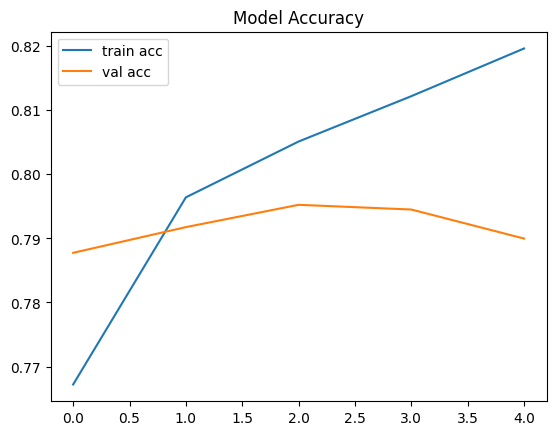

In [14]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [15]:
preds = model.predict(x_val)
preds_binary = (preds > 0.5).astype(int)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step


In [16]:
preds

array([[0.7290635 ],
       [0.71949965],
       [0.9163406 ],
       ...,
       [0.68142766],
       [0.8034804 ],
       [0.32962072]], dtype=float32)

In [17]:
preds_binary

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds_binary))
print(confusion_matrix(y_test, preds_binary))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51    159790
           1       0.50      0.47      0.48    160210

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.50    320000
weighted avg       0.50      0.50      0.50    320000

[[84949 74841]
 [85512 74698]]


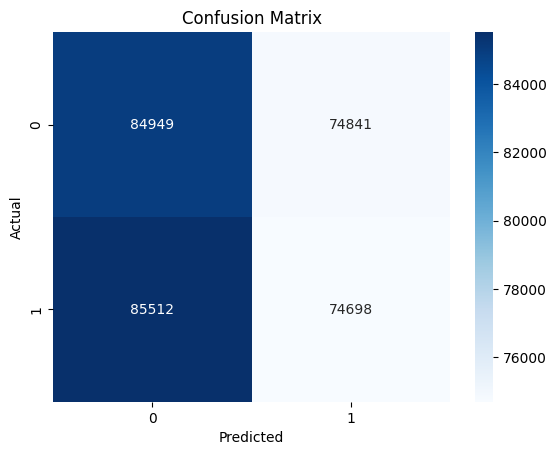

In [19]:
cm = confusion_matrix(y_test, preds_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(480271), np.int64(1): np.int64(479729)}


Initial training results: the model can be improved. Will try again.

In [21]:
df['sentiment'].value_counts()

sentiment
0    800000
1    800000
Name: count, dtype: int64